In [4]:
import os
import pandas as pd
import sys
from platform import python_version
python_version()

'3.10.2'

In [5]:
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages")
import snscrape.modules.twitter as sntwitter

In [6]:
# Creating list to append tweet data to
tweets_list1 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('(#cryptocurrency OR #crypto) filter:verified since:2020-08-01').get_items()):
    tweets_list1.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
    
# Creating a dataframe from the tweets list above 
tweets_df1 = pd.DataFrame(tweets_list1, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])


In [7]:
tweets_df1

,Datetime,Tweet Id,Text,Username
0,2022-05-17 21:20:45+00:00,1526674103859568640,Because of the current #crypto market conditio...,MajesticDrama
1,2022-05-17 21:20:18+00:00,1526673992840617986,#Crypto has already lost more than $1 trillion...,Forbes_MENA_
2,2022-05-17 21:18:03+00:00,1526673427003854848,While #HODLing is generally associated with #c...,coinflip
3,2022-05-17 21:17:37+00:00,1526673317482139648,JUST IN: Bank of England Official Says Retail ...,TheDustyBC
4,2022-05-17 21:08:53+00:00,1526671118551113728,What #cryptocurrency is outperforming your exp...,BinanceUS
...,...,...,...,...
116468,2020-08-01 07:57:18+00:00,1289470246508793857,I’ll say that $VET will be the one #crypto tha...,davidgokhshtein
116469,2020-08-01 07:01:02+00:00,1289456084277579776,"#Interview with top #Fintech Influencer, Found...",Onalytica
116470,2020-08-01 06:17:09+00:00,1289445044403961857,5/6 Us - If you get a chance to meet @narendra...,CoinDCX
116471,2020-08-01 06:17:07+00:00,1289445035222556673,1/6 #CryptoSpotlight with @blockchainlaw91\n\n...,CoinDCX


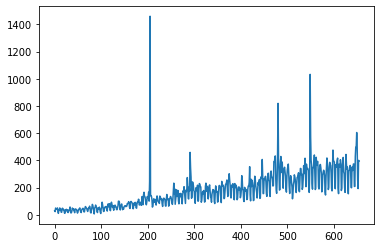

In [8]:
import matplotlib.pyplot as plt
tweets_df1["date"] = pd.to_datetime(tweets_df1["Datetime"]).dt.date
tweets_df1["tweet_count"] = 1
countGroups1 = tweets_df1.groupby(['date']).sum()["tweet_count"]
countGroups1
plt.plot(range(0, len(countGroups1)), countGroups1)

In [9]:
tweets_df1.to_csv("allcrypto-twitter-unverified.csv")

In [10]:
countGroups1

date
2020-08-01     30
2020-08-02     24
2020-08-03     50
2020-08-04     45
2020-08-05     43
             ... 
2022-05-13    502
2022-05-14    259
2022-05-15    193
2022-05-16    400
2022-05-17    396
Name: tweet_count, Length: 655, dtype: int64